In [2]:
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df1 = pd.read_csv('English_Abstractive.csv')

from sklearn.model_selection import train_test_split

# Separating features and labels
x = df1.iloc[:, :-1].values  # Feature vectors
y = df1['Judgement Status'].values  # Labels

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

[[ 0.04036511  0.20482703  0.08136609 ... -0.76152337 -0.16404587
  -0.33827469]
 [-3.78664969 -0.85732257 -0.64136295 ...  6.64188293  0.66995817
   1.42927037]
 [ 0.23011285 -1.66387014 -1.14345143 ...  2.04646192 -0.54857471
   0.29268756]
 ...
 [-0.45464965  0.79339726  0.15163465 ... -0.29263011 -0.16794799
  -0.2377603 ]
 [ 0.23011285 -1.66387014 -1.14345143 ...  2.04646192 -0.54857471
   0.29268756]
 [ 0.5070621  -0.19850132 -2.1412226  ...  0.14741436 -0.83451633
   2.87127635]]


In [5]:
from sklearn.linear_model import LinearRegression

# Select one attribute (column) from x_train
x_train_single = x_train[:, [0]]  # Selecting the first attribute

# Train the Linear Regression model
reg = LinearRegression().fit(x_train_single, y_train)

# Make predictions on the training data
y_train_pred = reg.predict(x_train_single)


In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R2 Score": r2
    }
train_metrics = evaluate_model(y_train, y_train_pred)
    
# Print the training metrics
for metric, value in train_metrics.items():
    print(f"{metric}: {value}")

MSE: 1.1370710287246588
RMSE: 1.0663353265857127
MAPE: 1457670920720964.0
R2 Score: 0.01112071650834523


In [7]:
x_test_single = x_test[:, [0]]  # Selecting the same attribute from test set
y_test_pred = reg.predict(x_test_single)

train_metrics = evaluate_model(y_test, y_test_pred)
    
# Print the training metrics
for metric, value in train_metrics.items():
    print(f"{metric}: {value}")

MSE: 1.254182684501505
RMSE: 1.1199029799502744
MAPE: 1970291408967648.0
R2 Score: -0.027732592575653525


In [8]:
# Using all attributes in X_train
reg_all = LinearRegression().fit(x_train, y_train)

# Make predictions and calculate metrics
y_train_pred_all = reg_all.predict(x_train)
y_test_pred_all = reg_all.predict(x_test)

train_metrics = evaluate_model(y_train, y_train_pred_all)
    
# Print the training metrics
for metric, value in train_metrics.items():
    print(f"{metric}: {value}")

print()
train_metrics = evaluate_model(y_test, y_test_pred_all)
    
# Print the training metrics
for metric, value in train_metrics.items():
    print(f"{metric}: {value}")

MSE: 0.7648200718929705
RMSE: 0.8745399201254169
MAPE: 1050751871093125.4
R2 Score: 0.3348570972370647

MSE: 1.5173254779387917e+26
RMSE: 12317976611192.244
MAPE: 7.228850283215114e+27
R2 Score: -1.2433634003190989e+26


In [14]:
from sklearn.cluster import KMeans

# Fit KMeans clustering (excluding the target variable)
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(x_train)

# Output labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print(f"Labels: {labels}")
print()
print(f"Cluster Centers: {centers}")

Labels: [0 1 1 0 0 1 2 0 0 0 1 0 1 1 1 0 0 1 2 2 0 1 0 0 0 2 1 0 1 1 2 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 2 0 1 0 0 0 2 1 0 1 0 2 2 2 0 2 2 0 0 0 0 0 0 0 2 2 1 0
 0 1 0 2 0 0 1 1 0 0 1 1 0 1 1 0 0 1 2 0 0 2 0 0 1 2 0 1 0 1 0 1 1 0 2 0 0
 1 0 0 1 0 0 0 2 1 2 0 1 0 1 2 1 0 1 1 1 1 0 1 0 0 0 2 0 0 1 0 0 2 0 0 0 0
 0 0 1 0 1 0 0 3 0 0 0 0 1 0 1 0 2 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1
 0 1 0 1 1 1 2 0 0 0 1 0 2 1 1 0 1 1 0 1 2 1 1 0 0 0 0 0 0 0 1 1 1 3 1 0 0
 0 1 1 1 2 0 0 0 0 1 0 1 0 1 1 1 0 2 0 0 0 1 1 1 3 1 1 1 0 0 0 1 3 0 1 2 1
 1 2 0 0 1 0 1 0 1 0 2 1 0 0 0 0 1 0 1 1 1 2 1 1 1 2 0 1 1 0 0 1 1 0 0 0 1
 0 1 1 1 0 3 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 2 1 2 2 1 0 2 1 0 2
 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 2 2 2 0 1 1 0 1 2 0 2 0
 0 0 0 2 2 1 0 1 0 0 0 1 2 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 2 1 0 1 3 1
 1 1 0 0 1 1 3 1 1 0 1 1 1]

Cluster Centers: [[-0.01014063  0.02378678  0.00301939 ...  0.04548866 -0.01419865
  -0.00632731]
 [-0.01330949 -0.06406001 -0.01854241 ..

C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [16]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette = silhouette_score(x_train, kmeans.labels_)

# Calculate Calinski-Harabasz Score (CH Score)
ch_score = calinski_harabasz_score(x_train, kmeans.labels_)

# Calculate Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(x_train, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"CH Score: {ch_score}")
print(f"DB Index: {db_index}")

Silhouette Score: 0.31194806889291415
CH Score: 82.65659656137225
DB Index: 1.4424362949511027


In [18]:
scores = []
for k in range(2, 10):  # You can expand the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42).fit(x_train)
    silhouette = silhouette_score(x_train, kmeans.labels_)
    ch_score = calinski_harabasz_score(x_train, kmeans.labels_)
    db_index = davies_bouldin_score(x_train, kmeans.labels_)
    scores.append((k, silhouette, ch_score, db_index))

# Print the scores
for score in scores:
    print(f"k = {score[0]}: Silhouette = {score[1]}, CH Score = {score[2]}, DB Index = {score[3]}")


C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

k = 2: Silhouette = 0.03714985126711369, CH Score = 2.8423344449910006, DB Index = 0.9091259855646955
k = 3: Silhouette = 0.1724455512238192, CH Score = 63.38359655518486, DB Index = 0.9936548661800652
k = 4: Silhouette = 0.29061243883605264, CH Score = 86.81177207975776, DB Index = 1.0506785965084637
k = 5: Silhouette = 0.3504988381079284, CH Score = 86.66913668089295, DB Index = 1.5810488013045756
k = 6: Silhouette = 0.35784129919046453, CH Score = 71.58214838934968, DB Index = 1.471175341938004
k = 7: Silhouette = 0.3895832265260708, CH Score = 72.04370509927269, DB Index = 1.3296650869978808
k = 8: Silhouette = 0.4101176003516989, CH Score = 79.11319943527323, DB Index = 1.2279228077614475
k = 9: Silhouette = 0.38529680970846264, CH Score = 82.1391208630866, DB Index = 1.2326524912481718


C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ojast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

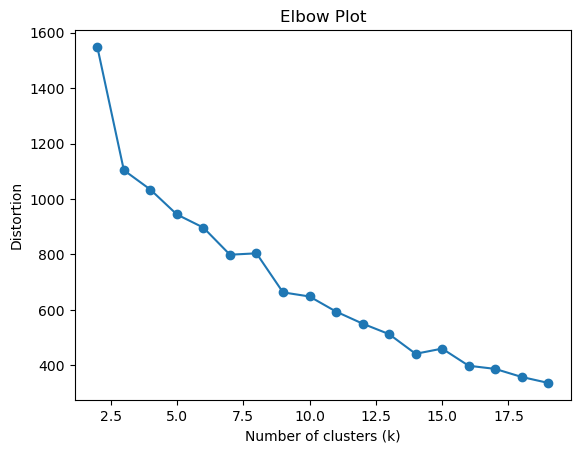

In [20]:
import matplotlib.pyplot as plt

distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(x_train)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Plot')
plt.show()